In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_food = pd.read_csv(r'D:\Udemy\Udemy - The Python Bootcamp Data Science, Analytics & Visualisation\8. Data Visualisation - Matplotlib\2.1 Food Orders.csv')
df_food.head(5)

,Food Order ID,Customer ID,Restaurant Name,Meal Ordered,Day,Quantity,Price Per Item
0,1001,A,Oasis Seafood,Seafood Platter,Tuesday,2,19.99
1,1002,A,Oasis Seafood,Scallops,Friday,3,8.99
2,1003,A,Green Fuel,Falafel,Friday,3,4.99
3,1004,B,Green Fuel,Mixed Lentils,Friday,3,6.99
4,1005,B,Oasis Seafood,Seafood Platter,Tuesday,3,19.99


In [5]:
df_food['Day'].unique()

array(['Tuesday', 'Friday', 'Monday', 'Thursday', 'Saturday', 'Wednesday',
       'Sunday'], dtype=object)

In [3]:
df_food['Day'].replace({'Monday':'01 - Monday','Tuesday':'02 - Tuesday','Wednesday':'03 - Wednesday'\
                       , 'Thursday':'04 - Thursday','Friday':'05 - Friday','Saturday':'06 - Saturday'\
                       , 'Sunday':'07 - Sunday'},inplace = True)

In [4]:
df_food['Total Amount'] = df_food['Quantity'] * df_food['Price Per Item']

In [10]:
df_food.dtypes

Food Order ID        int64
Customer ID         object
Restaurant Name     object
Meal Ordered        object
Day                 object
Quantity             int64
Price Per Item     float64
Total Amount       float64
dtype: object

In [11]:
df_food.corr()

,Food Order ID,Quantity,Price Per Item,Total Amount
Food Order ID,1.000000,-0.150115,0.025030,-0.084534
Quantity,-0.150115,1.000000,0.202761,0.667909
Price Per Item,0.025030,0.202761,1.000000,0.827865
Total Amount,-0.084534,0.667909,0.827865,1.000000


In [6]:
df_pre_agg_a = df_food[['Customer ID','Total Amount']]
df_pre_agg_a.head()

,Customer ID,Total Amount
0,A,39.98
1,A,26.97
2,A,14.97
3,B,20.97
4,B,59.97


In [15]:
df_agg = df_pre_agg_a.groupby('Customer ID',as_index = False).sum()

In [16]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer ID   13 non-null     object 
 1   Total Amount  13 non-null     float64
dtypes: float64(1), object(1)
memory usage: 312.0+ bytes


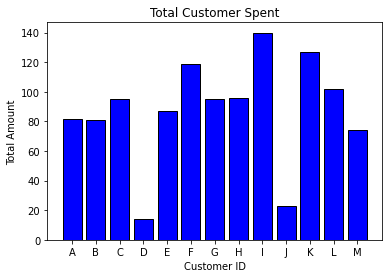

In [19]:
x = df_agg['Customer ID']
y = df_agg['Total Amount']
plt.bar(x,y,color='blue',edgecolor='black')
plt.title('Total Customer Spent')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.show()

In [20]:
df_pre_agg_b = df_food[['Day','Total Amount']]
df_agg_b = df_pre_agg_b.groupby('Day',as_index=False).sum()

In [22]:
df_agg_b

,Day,Total Amount
0,01 - Monday,225.74
1,02 - Tuesday,253.83
2,03 - Wednesday,144.86
3,04 - Thursday,61.94
4,05 - Friday,221.80
5,06 - Saturday,158.87
6,07 - Sunday,66.92


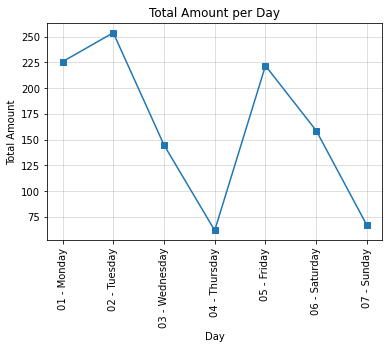

In [37]:
#Plot y versus x as lines and/or markers.
x = df_agg_b['Day']
y = df_agg_b['Total Amount']
#for beter understand plot, use point of the line
#for squre s, for circle o and v....
#https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
plt.plot(x,y,marker='s')
plt.xticks(rotation='vertical')
plt.grid(alpha=0.5)
plt.xlabel('Day')
plt.ylabel('Total Amount')
plt.title('Total Amount per Day')
plt.show()

In [40]:
df_pre_agg_c = df_food[['Restaurant Name','Total Amount']]
df_agg_c = df_pre_agg_c.groupby('Restaurant Name',as_index = False).sum()
df_agg_c

,Restaurant Name,Total Amount
0,BBQ Pit Kings,322.73
1,Chicken Roller,226.75
2,Green Fuel,137.78
3,Oasis Seafood,446.70


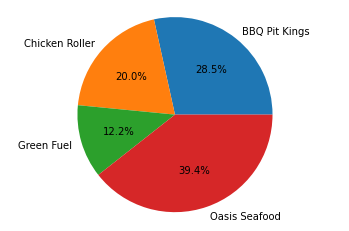

In [44]:
x = df_agg_c['Restaurant Name']
y = df_agg_c['Total Amount']
plt.pie(y,labels = x,autopct="%1.1f%%")
#autopct show number in the chart
plt.axis('equal')
plt.show()

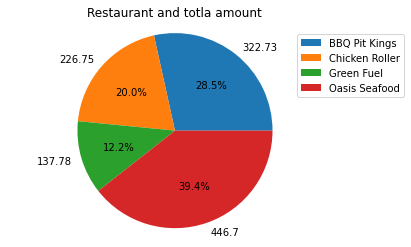

In [50]:
x = df_agg_c['Restaurant Name']
y = df_agg_c['Total Amount']
plt.pie(y,labels = round(y,2),autopct="%1.1f%%")
#autopct show number in the chart
plt.legend(x,loc='center right',bbox_to_anchor=(0.7,0.3,0.5,1))
#add legend
plt.title('Restaurant and totla amount')
plt.axis('equal')
plt.show()